In [53]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [54]:
def ba_network(N, m) :
    '''
    Generate and return a network with a scale-free degree distribution,
    generated according to the Barabási-Albert network model.

    Starting from `m0 = m` nodes in a fully-connected network, add a
    new node and connect it to `m` existing nodes with probability proportional
     to node degree. Repeat until there are `N` nodes in the network.
    '''
    # Initialize with fully-connected network
    m0 = m
    G = nx.complete_graph(m0)

    idx = np.array(range(N))    # Index of node labels (used for sampling)
    ks = np.zeros(N)            # Array of node degrees
    ks[:m0] = m0 - 1
    k_sum = m0 * (m0 - 1)       # Counter for total degree

    # Add t = N - m0 nodes
    for i in range(m0, N) :
        # Pick nodes to connect to
        ns = np.random.choice(idx, size=m, replace=False, p=ks/k_sum)

        # Add edges from new node (i) to selected nodes (ns)
        G.add_edges_from(zip([i]*m, ns))

        # Update degree array and counters
        ks[i] = m
        np.add.at(ks, ns, 1)
        k_sum = k_sum + 2*m

    return G

In [55]:
m = 3
N = 10000

G = ba_network(N, m)

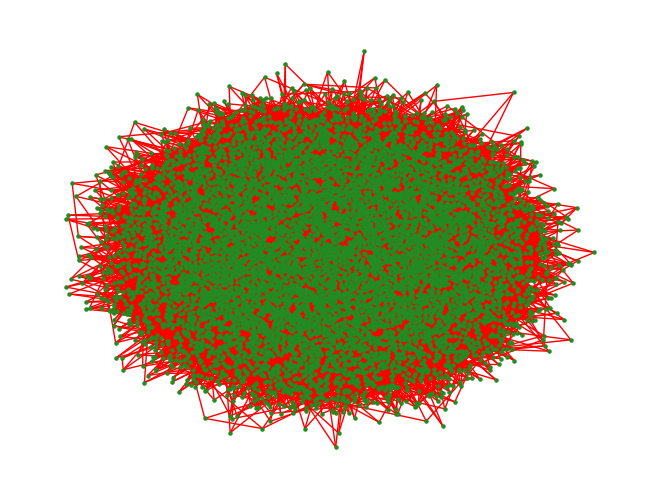

In [56]:
COLOR = '#228B22'
nx.draw(G, node_color = COLOR, edge_color ='r', node_size=5)

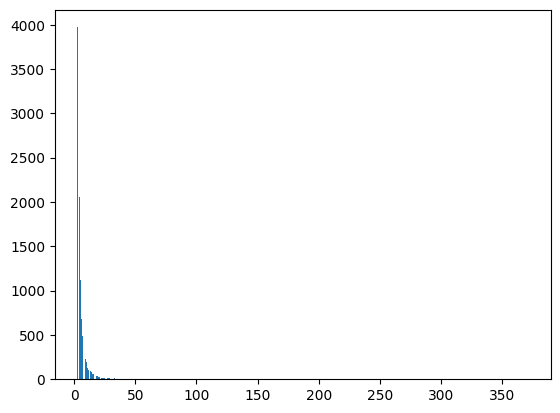

In [57]:
#compare degree distributions
import collections

def plot_degree_distribution(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    plt.bar(deg, cnt)

plot_degree_distribution(G)

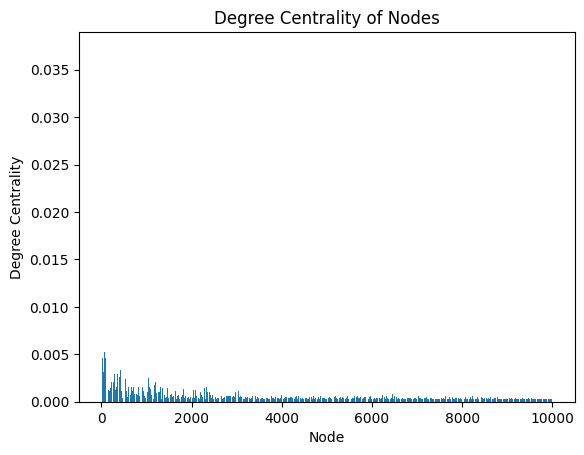

In [58]:
#Degree Centrality
deg_cen = nx.degree_centrality(G)
plt.bar(deg_cen.keys(), deg_cen.values())
plt.xlabel('Node')
plt.ylabel('Degree Centrality')
plt.title('Degree Centrality of Nodes')
plt.show()

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 50, 51, 52, 54, 59, 61, 62, 64, 65, 66, 70, 71, 73, 75, 77, 81, 86, 87, 90, 96, 103, 115, 123, 127, 138, 139, 141, 167, 232, 239, 272, 371]
[3971, 2052, 1125, 684, 483, 340, 226, 195, 130, 104, 96, 78, 62, 57, 41, 33, 33, 25, 25, 18, 14, 16, 17, 11, 16, 10, 18, 8, 5, 6, 9, 6, 5, 7, 1, 6, 3, 2, 1, 2, 4, 3, 2, 2, 3, 2, 4, 2, 4, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


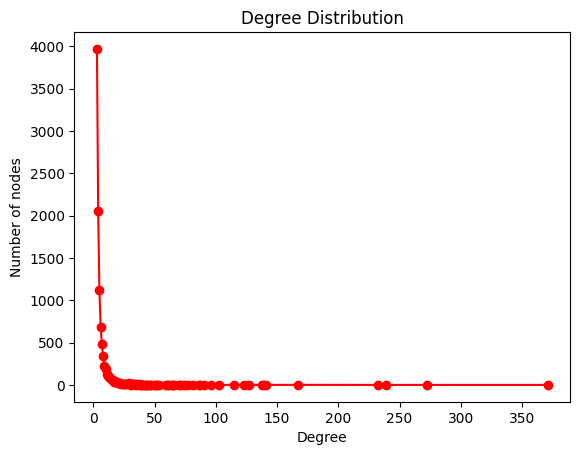

In [59]:
def plot_deg_dist(G):
    all_degrees = [deg for node, deg in nx.degree(G)]  # Extracting degrees from DegreeView
    unique_degrees = list(set(all_degrees))
    unique_degrees.sort()
    count_of_degrees = [all_degrees.count(deg) for deg in unique_degrees]

    print(unique_degrees)
    print(count_of_degrees)

    plt.plot(unique_degrees, count_of_degrees, 'ro-')
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes')
    plt.title('Degree Distribution')
    plt.show()

plot_deg_dist(G)

In [60]:
# Define a function to plot the degree distribution of a graph G
def plot_deg_distribution(G):
    deg_histogram = nx.degree_histogram(G)
    deg_histogram = np.array(deg_histogram, dtype=float)
    deg_probability = deg_histogram/G.number_of_nodes()
    plt.loglog(np.arange(deg_probability.shape[0]),deg_probability,'b.')
    plt.xlabel('k')
    plt.ylabel('p(k)')
    plt.title('Degree Distribution')
    print(G)
    plt.show()

In [61]:
# Define a function to plot the degree distribution frequency of a graph G
def plot_deg_dist_frequency(G):
  degrees = [val for (node, val) in G.degree()]
  plt.hist(degrees, bins=np.arange(min(degrees)-0.5, max(degrees)+1.5, 1), color='skyblue', edgecolor='black')
  plt.title("Degree Distribution of the Network")
  plt.xlabel("Degree")
  plt.ylabel("Frequency")
  plt.show()

In [62]:
def degree_centrality(G):

    nodes =[]
# Calculate the number of nodes in the graph
    num_nodes = G.number_of_nodes()
# Iterate through the  nodes and store their  centrality values
    for node in range(1, num_nodes):
        nodes.append(node)


    top = set(nodes)
    bottom = set(G) - top
    s = 1.0 / len(bottom)
    centrality = dict((n, d * s) for n, d in G.degree(top))
    s = 1.0 / len(top)
    centrality.update(dict((n, d * s) for n, d in G.degree(bottom)))
    num_nodes = G.number_of_nodes()
    centrality = {nodes: centrality[nodes] / num_nodes for nodes in centrality}

    return centrality

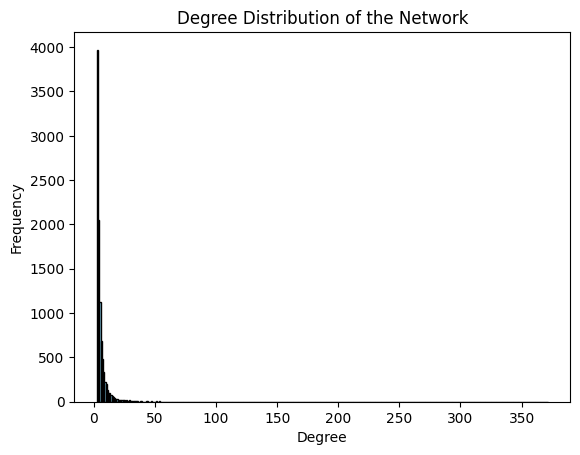

Graph with 10000 nodes and 29994 edges


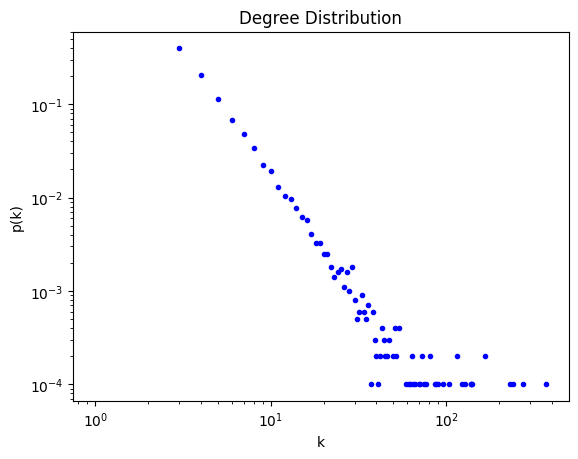

In [63]:
plot_deg_dist_frequency(G)
plot_deg_distribution(G)

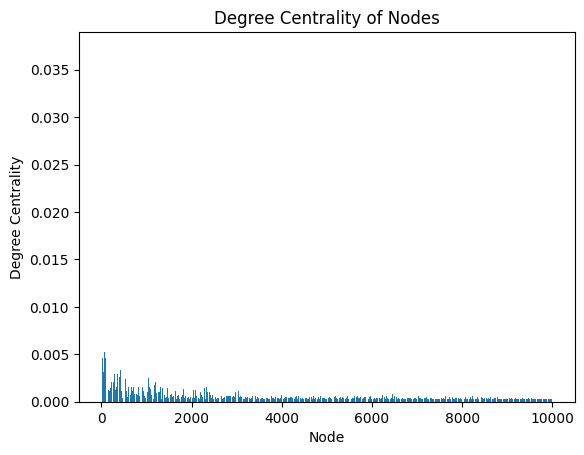

In [64]:
#Find all the centrality measures of all the nodes

#Degree Centrality
deg_cen = nx.degree_centrality(G)
plt.bar(deg_cen.keys(), deg_cen.values())
plt.xlabel('Node')
plt.ylabel('Degree Centrality')
plt.title('Degree Centrality of Nodes')
plt.show()

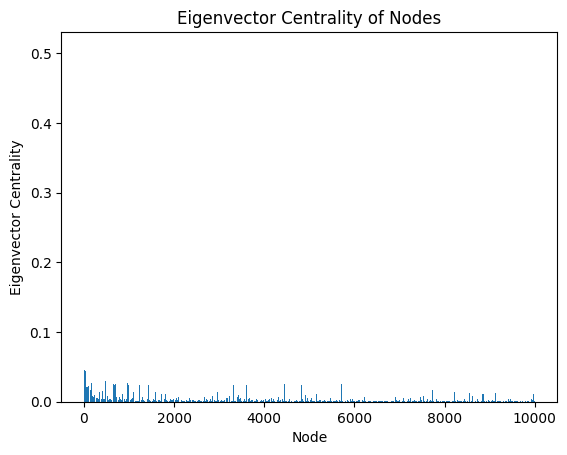

In [65]:
eig_cen = nx.eigenvector_centrality(G)
plt.bar(eig_cen.keys(), eig_cen.values())
plt.xlabel('Node')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality of Nodes')
plt.show()

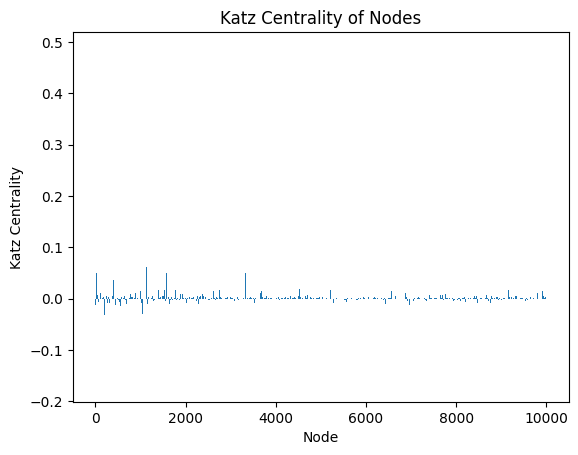

In [66]:
katz_cen = nx.katz_centrality_numpy(G)
plt.bar(katz_cen.keys(), katz_cen.values())
plt.xlabel('Node')
plt.ylabel('Katz Centrality')
plt.title('Katz Centrality of Nodes')
plt.show()

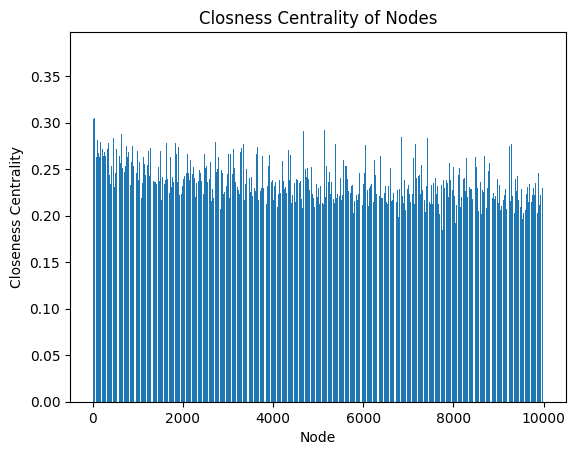

In [67]:
closeness_cen = nx.closeness_centrality(G)
plt.bar(closeness_cen.keys(), closeness_cen.values())
plt.xlabel('Node')
plt.ylabel('Closeness Centrality')
plt.title('Closness Centrality of Nodes')
plt.show()

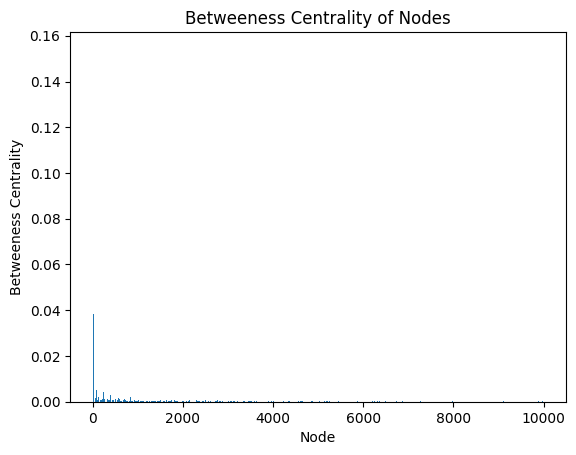

In [68]:
#betweeness centrality
bet_cen = nx.betweenness_centrality(G)
plt.bar(bet_cen.keys(), bet_cen.values())
plt.xlabel('Node')
plt.ylabel('Betweeness Centrality')
plt.title('Betweeness Centrality of Nodes')
plt.show()

Finding giant components of first dataset newdata

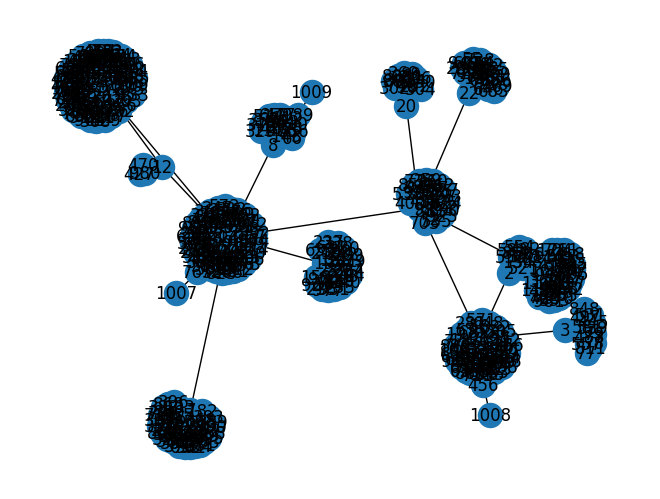

In [69]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to load dataset into a NetworkX graph
# Function to load dataset into a NetworkX graph
def load_dataset(filename):
    # Assuming the dataset is an edge list CSV file
    G = nx.read_edgelist(filename, delimiter=',', nodetype=str)
    return G


# Function to find the Giant Component
def find_giant_component(G):
    # Get connected components
    connected_components = list(nx.connected_components(G))
    # Find the largest connected component
    giant_component = max(connected_components, key=len)
    return G.subgraph(giant_component)

# Function to display graph
def display_graph(G):
    pos = nx.spring_layout(G)  # Define layout for better visualization
    nx.draw(G, pos, with_labels=True)
    plt.show()

# Main function
def main():
    filename = "newdata2.csv"  # Update with your dataset filename
    G = load_dataset(filename)

    giant_component = find_giant_component(G)
    display_graph(giant_component)

if __name__ == "__main__":
    main()


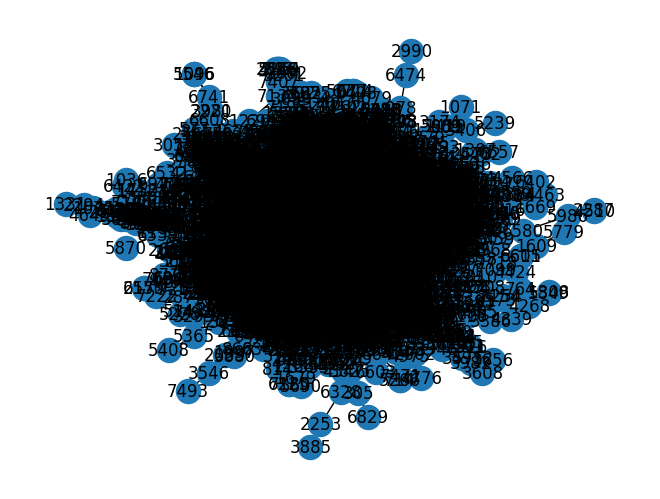

In [70]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to load dataset into a NetworkX graph
# Function to load dataset into a NetworkX graph
def load_dataset(filename):
    # Assuming the dataset is an edge list CSV file
    G = nx.read_edgelist(filename, delimiter=',', nodetype=str)
    return G


# Function to find the Giant Component
def find_giant_component(G):
    # Get connected components
    connected_components = list(nx.connected_components(G))
    # Find the largest connected component
    giant_component = max(connected_components, key=len)
    return G.subgraph(giant_component)

# Function to display graph
def display_graph(G):
    pos = nx.spring_layout(G)  # Define layout for better visualization
    nx.draw(G, pos, with_labels=True)
    plt.show()

# Main function
def main():
    filename = "lastfm_asia_edges.csv"  # Update with your dataset filename
    G = load_dataset(filename)

    giant_component = find_giant_component(G)
    display_graph(giant_component)

if __name__ == "__main__":
    main()

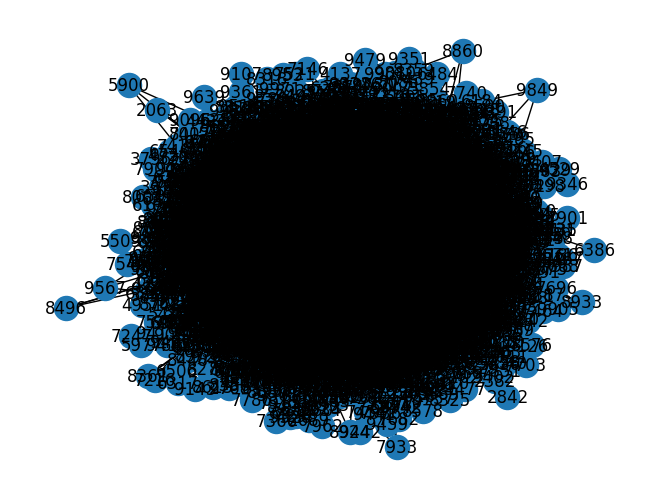

In [71]:
import random
# Creation of our scale-free network

n = 10000 # number of nodes in our network
m = 3	  # number of initial links from a new node to the existing nodes

scale_free_graph = nx.barabasi_albert_graph(n,m)

# assigning the edge probabilities to the edges
for(a,b,c) in scale_free_graph.edges(data=True):
	c['weight'] = random.uniform(0,1)


# visualise the created network
nx.draw(scale_free_graph, with_labels=True) # to display node with numbers
plt.show()